# Import des modules nécessaires

In [3]:
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns
sns.set()

# 1. Graphiques basiques en `matplotlib`

In [4]:
# On se sert d'un jeu de données tout fait
df = sns.load_dataset('titanic')

df.info()

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
205,0,3,female,2.0,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
389,1,2,female,17.0,0,0,12.0000,C,Second,woman,False,NaN,Cherbourg,yes,True
501,0,3,female,21.0,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,no,True


Il existe deux syntaxes en `matplotlib` :
1. La syntaxe "historique" qui fonctionne avec tout objet (liste, `np.array`, `pd.Series`) : `plt.plot(x, y)` ;
2. La syntaxe adaptée à `pandas` : `df.plot.bar()`.

Affichons l'âge en fonction du prix du billet.

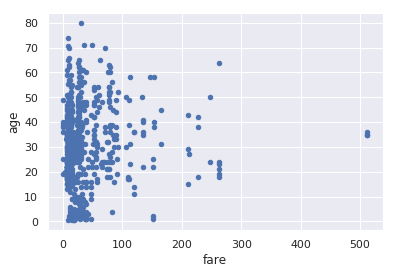

In [5]:
df.plot.scatter('fare', 'age', c='b')
plt.show()

Il est important de toujours mettre un titre au graphique et aux axes !

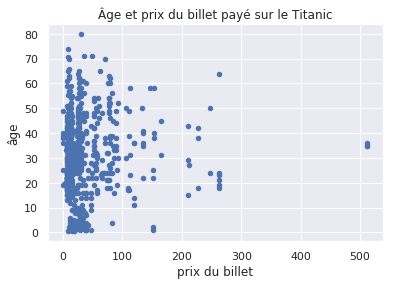

In [6]:
ax = df.plot.scatter('fare', 'age', c='b')
ax.set(
    title="Âge et prix du billet payé sur le Titanic",
    xlabel="prix du billet",
    ylabel="âge"
)
plt.show()

On peut changer la taille du graphique.

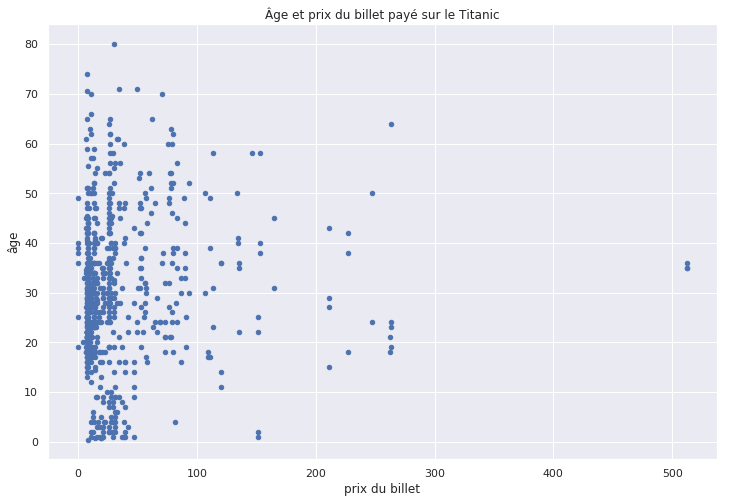

In [7]:
ax = df.plot.scatter('fare', 'age', c='b', figsize=(12, 8))
ax.set(
    title="Âge et prix du billet payé sur le Titanic",
    xlabel="prix du billet",
    ylabel="âge"
)
plt.show()

Voici quelques autres graphiques basiques.

# 2. Graphiques plus complexes avec regroupements

La plupart du temps, on veut afficher des graphes plus complexes, faisant intervenir des `groupby`.

Par exemple :
* Quel est l'âge moyen dans chaque classe ?
* Quel est le nombre de survivants en fonction de la ville de départ ?

Commençons par construire ces données

In [69]:
# âge moyen par classe
df.groupby('class')['age'].mean()

class
First     38.233441
Second    29.877630
Third     25.140620
Name: age, dtype: float64

Pour l'afficher dans un graphique, c'est alors très simple.

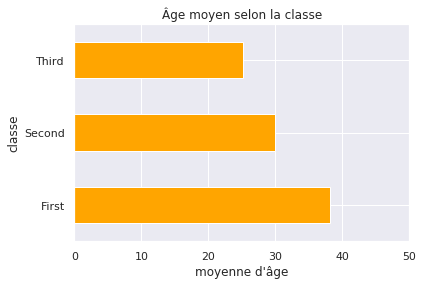

In [10]:
ax = df.groupby('class')['age'].mean().plot.barh(color='orange')
ax.set(
    title="Âge moyen selon la classe",
    xlabel="moyenne d'âge",
    ylabel="classe",
    xlim=[0, 50]
)
plt.show()

C'est très pratique pour afficher directement le pourcentage de valeurs vides dans chaque colonne.

In [71]:
df.isnull().mean(axis='rows')

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

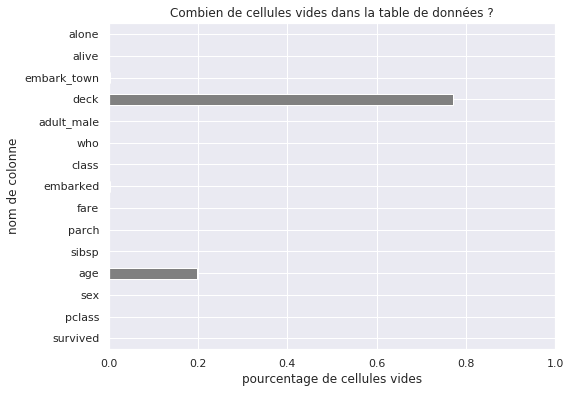

In [9]:
ax = df.isnull().mean(axis='rows').plot.barh(color='grey', figsize=(8, 6))
ax.set(
    title="Combien de cellules vides dans la table de données ?",
    xlabel="pourcentage de cellules vides",
    ylabel="nom de colonne",
    xlim=[0, 1]
)
plt.show()

# 3. Graphiques statistiques avancés avec `seaborn`

Le module `seaborn` est une "surcouche" à `matplotlib` très adaptée à la data science.

## Graphiques de relations simples

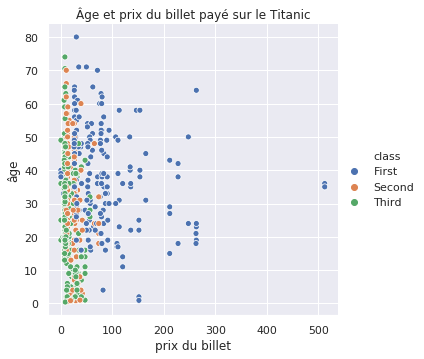

In [73]:
ax = sns.relplot(x="fare", y="age", hue="class", data=df)
ax.set(
    title="Âge et prix du billet payé sur le Titanic",
    xlabel="prix du billet",
    ylabel="âge"
)
plt.show()

## Analyser des variables catégorielles

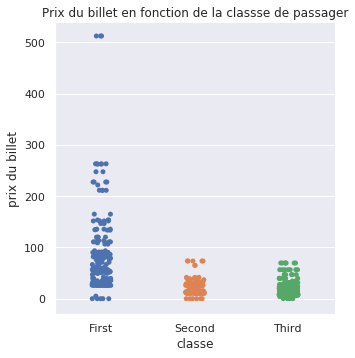

In [74]:
ax = sns.catplot(x="class", y="fare", data=df)
ax.set(
    title="Prix du billet en fonction de la classse de passager",
    xlabel="classe",
    ylabel="prix du billet"
)
plt.show()

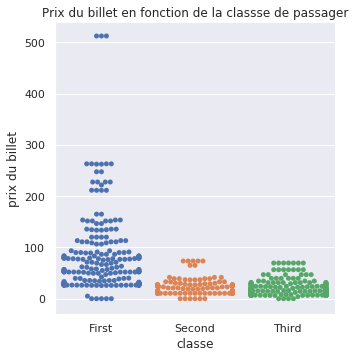

In [75]:
ax = sns.catplot(x="class", y="fare", kind='swarm', data=df)
ax.set(
    title="Prix du billet en fonction de la classse de passager",
    xlabel="classe",
    ylabel="prix du billet"
)
plt.show()

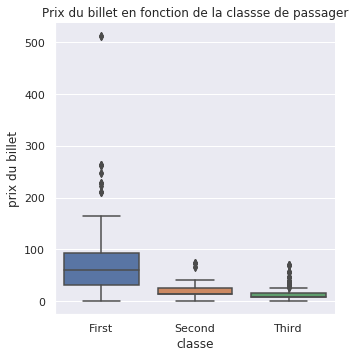

In [76]:
ax = sns.catplot(x="class", y="fare", kind='box', data=df)
ax.set(
    title="Prix du billet en fonction de la classse de passager",
    xlabel="classe",
    ylabel="prix du billet"
)
plt.show()

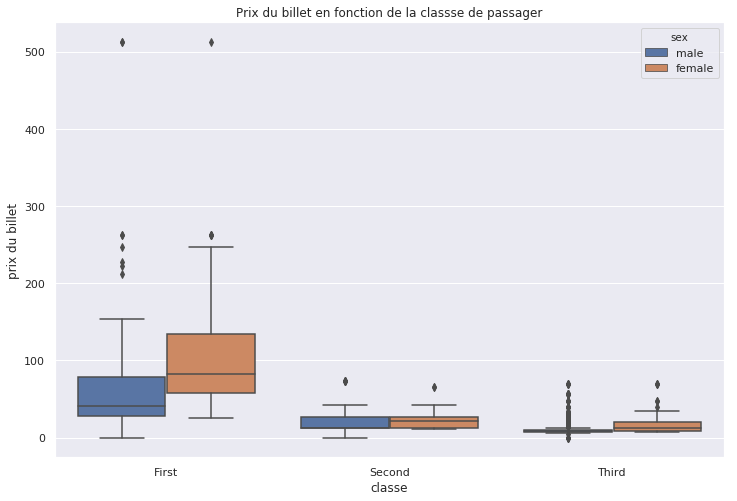

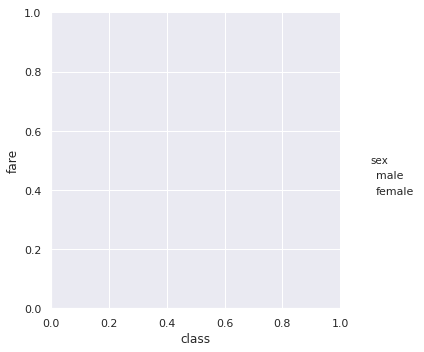

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
sns.catplot(x="class", y="fare", hue='sex', kind='box', data=df, ax=ax)
ax.set(
    title="Prix du billet en fonction de la classse de passager",
    xlabel="classe",
    ylabel="prix du billet"
)
plt.show()

## Graphiques à barres

Le module `seaborn` peut aussi s'occuper directement de tracer les intervalles de confiance !

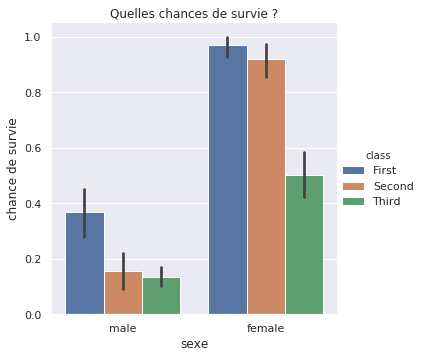

In [78]:
ax = sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=df);
ax.set(
    title="Quelles chances de survie ?",
    xlabel="sexe",
    ylabel="chance de survie"
)
plt.show()

On peut, plus simplement, lorsqu'on veut compter le nombre de valeurs dans une colonne, utiliser `sns.countplot`.

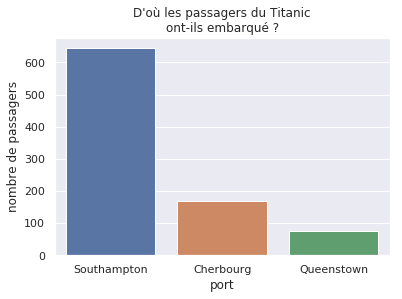

In [80]:
ax = sns.countplot(x="embark_town", data=df)
ax.set(
    title="D'où les passagers du Titanic\nont-ils embarqué ?",
    xlabel="port",
    ylabel="nombre de passagers"
)
plt.show()

## Distributions

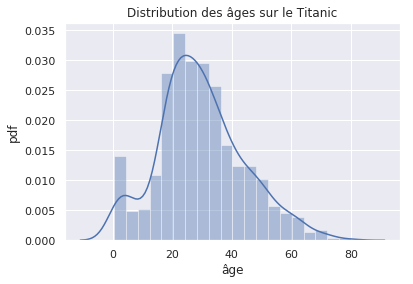

In [40]:
ax = sns.distplot(df['age'].dropna())
ax.set(
    title="Distribution des âges sur le Titanic",
    xlabel="âge",
    ylabel="pdf"
)
plt.show()

On peut ne pas tracer l'estimation à noyaux et afficher vraiment le compte (et non la densité) en ordonnées.

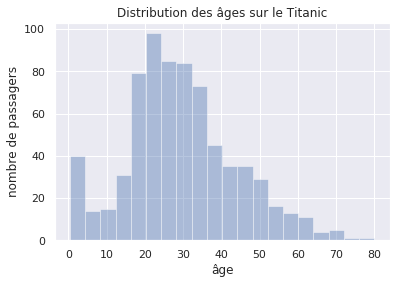

In [42]:
ax = sns.distplot(df['age'].dropna(), kde=False, norm_hist=False)
ax.set(
    title="Distribution des âges sur le Titanic",
    xlabel="âge",
    ylabel="nombre de passagers"
)
plt.show()

## Distributions en 2D

Pour cela, on utilise un nouveau jeu de données qui représente des factures aux tables d'un restaurant, ainsi que les montants des pourboires.

In [44]:
df = sns.load_dataset('tips')

df.info()

df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


,total_bill,tip,sex,smoker,day,time,size
179,34.63,3.55,Male,Yes,Sun,Dinner,2
182,45.35,3.50,Male,Yes,Sun,Dinner,3
52,34.81,5.20,Female,No,Sun,Dinner,4


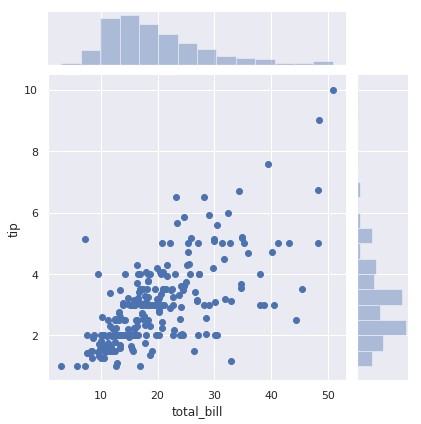

In [50]:
sns.jointplot(x="total_bill", y="tip", data=df)
plt.show()

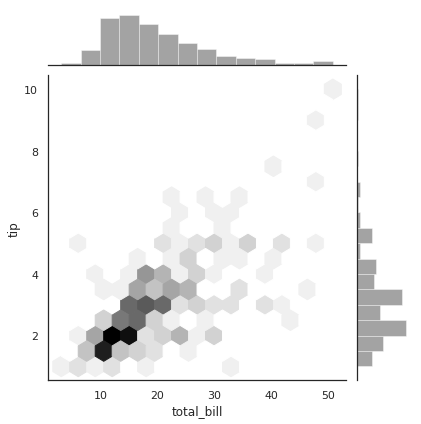

In [52]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", data=df, kind="hex", color="k")
plt.show()

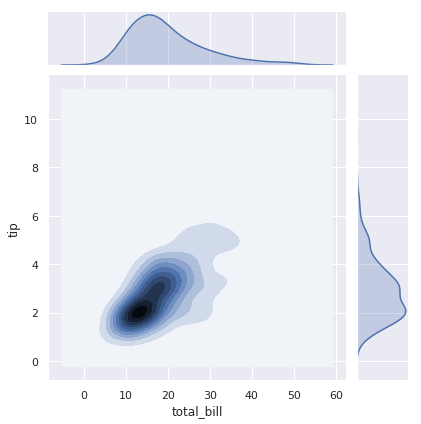

In [53]:
sns.jointplot(x="total_bill", y="tip", data=df, kind='kde')
plt.show()

Encore plus magique, on peut aussi observer d'un coup les distributions et corrélations entre toutes les variables numériques de notre `DataFrame` !

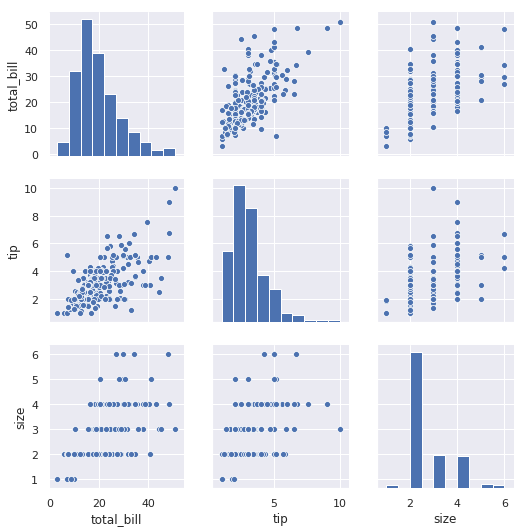

In [55]:
sns.pairplot(df)
plt.show()

## Relations entre variables

*Last but not least*, `seaborn` permet d'observer très facilement le résultat de régressions linéaires.

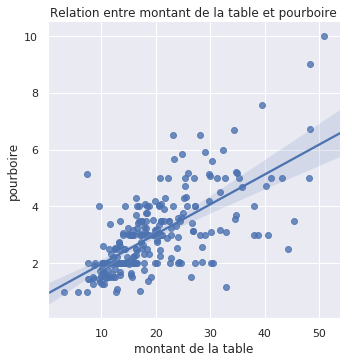

In [58]:
ax = sns.lmplot(x="total_bill", y="tip", data=df)
ax.set(
    title="Relation entre montant de la table et pourboire",
    xlabel="montant de la table",
    ylabel="pourboire"
)
plt.show()

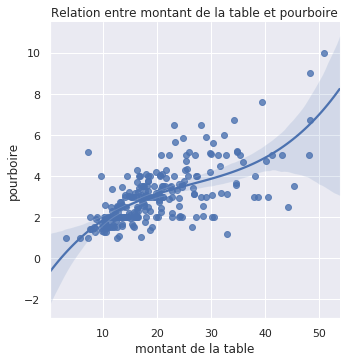

In [63]:
ax = sns.lmplot(x="total_bill", y="tip", data=df, order=3)
ax.set(
    title="Relation entre montant de la table et pourboire",
    xlabel="montant de la table",
    ylabel="pourboire"
)
plt.show()